# **Kütüphaneler**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import time

# **Dosyayı Oku**

In [27]:
df=pd.read_csv('heart_final.csv')
df.head()

,HeartDisease,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,...,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,BMI_log
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.563471
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.904681
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.421973
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.451810
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.487914


# **Modeli Eğitimi ve Sonuçları**

In [28]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iterasyon 0: Kayıp = 0.6931471805599454
Iterasyon 100: Kayıp = 0.6034653941293291
Iterasyon 200: Kayıp = 0.574460252707976
Iterasyon 300: Kayıp = 0.5596591823846432
Iterasyon 400: Kayıp = 0.5502628333306004
Iterasyon 500: Kayıp = 0.5435282882814442
Iterasyon 600: Kayıp = 0.5383411335607172
Iterasyon 700: Kayıp = 0.534163285297752
Iterasyon 800: Kayıp = 0.5306994157195593
Iterasyon 900: Kayıp = 0.5277704080424891
Iterasyon 1000: Kayıp = 0.5252587250937191
Iterasyon 1100: Kayıp = 0.5230823137160197
Iterasyon 1200: Kayıp = 0.5211810631544074
Iterasyon 1300: Kayıp = 0.5195092670966462
Iterasyon 1400: Kayıp = 0.5180311631668797
Iterasyon 1500: Kayıp = 0.5167181465034046
Iterasyon 1600: Kayıp = 0.5155469431084558
Iterasyon 1700: Kayıp = 0.5144983603070765
Iterasyon 1800: Kayıp = 0.5135563998065061
Iterasyon 1900: Kayıp = 0.5127076080087286
Iterasyon 2000: Kayıp = 0.5119405874170619
Iterasyon 2100: Kayıp = 0.5112456211174667
Iterasyon 2200: Kayıp = 0.5106143789754507
Iterasyon 2300: Kayıp = 0

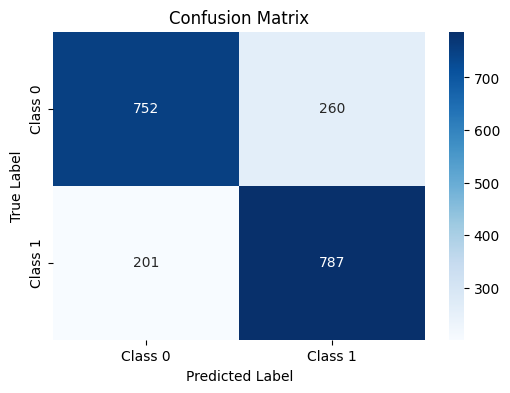

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = len(y)
    loss = - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape

    theta = np.zeros(n)
    bias = 0

    for i in range(iterations):

        z = np.dot(X, theta) + bias
        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)

        dz = y_pred - y
        dtheta = (1/m) * np.dot(X.T, dz)
        dbias = (1/m) * np.sum(dz)

        theta -= learning_rate * dtheta
        bias -= learning_rate * dbias

        if i % 100 == 0:
            print(f"Iterasyon {i}: Kayıp = {loss}")

    return theta, bias

def predict(X, theta, bias):
    z = np.dot(X, theta) + bias
    y_pred = sigmoid(z)
    return np.round(y_pred)

start_train = time.time()
theta, bias = gradient_descent(X_train.values, y_train.values, learning_rate=0.05, iterations=10000)
end_train = time.time()
print(f"Eğitim süresi: {end_train - start_train} saniye")

start_predict = time.time()
y_pred = predict(X_test.values, theta, bias)
end_predict= time.time()
print(f"Test süresi: {end_predict - start_predict} saniye")

cm=confusion_matrix(y_test.values, y_pred)
print(cm)
print(classification_report(y_test.values, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()